# **Business Insight Layer**

After ensuring that the **model predicts revenue**, the next steps are to :
<ul>
<li>Interpret revenue predictions</li>
<li>Create performance tiers</li>
<li>Simulate business scenarios</li>
<li>Build strategic recommendations</li>
<li>Perform sensitivity analysis</li>
</ul>
<br>
This transforms our ML model into a Decision Support System.

### **1. Imports**

In [22]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **2. Load Model & Data**

In [12]:
model = joblib.load("../models/revenue_prediction_pipeline.pkl")
df = pd.read_csv("../data/raw/small_business_sales.csv")
df.head()

,month,season,marketing_spend,website_visits,conversion_rate,num_customers,avg_order_value,discount_rate,revenue
0,2023-01,Winter,9270,25114,0.0419,1051,65.82,20,51733.52
1,2023-02,Winter,2860,8403,0.0292,245,68.88,10,13249.35
2,2023-03,Spring,7390,22536,0.0428,965,68.94,0,68308.74
3,2023-04,Spring,7191,22896,0.0440,1006,67.55,15,59930.53
4,2023-05,Spring,7734,28443,0.0288,818,57.93,20,41251.89


### **3. Generate Predictions**

In [13]:
X = df.drop("revenue", axis=1)
df["predicted_revenue"] = model.predict(X)
df[["revenue", "predicted_revenue"]].head()

,revenue,predicted_revenue
0,51733.52,57442.150126
1,13249.35,17968.958007
2,68308.74,66185.269493
3,59930.53,61594.651116
4,41251.89,39810.751158


### **4. Create Performance Classification**

In [47]:
q33 = df["predicted_revenue"].quantile(0.33)
q66 = df["predicted_revenue"].quantile(0.66)

print(q33, q66)


38972.4302081577 58189.60030401331


**Classification based on distribution:** <br>
split businesses into:
<ul>
<li>Bottom 33%</li>
<li>Middle 33%</li>
<li>Top 33%</li>
</ul>

In [48]:
def classify_performane(revenue):
    if revenue >= q66:
        return "High Growth Business"
    elif revenue >= q33:
        return "Stable Business"
    else: 
        return "Low Performance Business"

Everything is **data-driven**.<br>
If revenue in top 33% (>= q66) → High

<ul>
<li>Businesses are compared to each other</li>
<li>Performance is relative</li>
<li>System adapts automatically</li>
</ul>

In [ ]:
model = joblib.load("../models/revenue_prediction_pipeline.pkl")
df = pd.read_csv("../data/raw/small_business_sales.csv")
df.head()

,month,season,marketing_spend,website_visits,conversion_rate,num_customers,avg_order_value,discount_rate,revenue
0,2023-01,Winter,9270,25114,0.0419,1051,65.82,20,51733.52
1,2023-02,Winter,2860,8403,0.0292,245,68.88,10,13249.35
2,2023-03,Spring,7390,22536,0.0428,965,68.94,0,68308.74
3,2023-04,Spring,7191,22896,0.0440,1006,67.55,15,59930.53
4,2023-05,Spring,7734,28443,0.0288,818,57.93,20,41251.89


Now, we apply it to the predicted revenue :

In [49]:
df["performance_tier"] = df["predicted_revenue"].apply(classify_performane)
df["performance_tier"].value_counts()

performance_tier
Stable Business             8
Low Performance Business    8
High Growth Business        8
Name: count, dtype: int64

### **5. Strategic Recommendation Logic**

In [50]:
def generate_strategy(tier):
    if tier == "High Growth Business":
        return "Increase marketing investment and consider expansion"
    elif tier == "Stable Business":
        return "Optimize conversion rate and improve customer retention" 
    else:
        return "Reduce costs and redesign marketing strategy"

Then, apply it :

In [51]:
df["strategy"] = df["performance_tier"].apply(generate_strategy)
df[["predicted_revenue", "performance_tier", "strategy"]].head()


,predicted_revenue,performance_tier,strategy
0,57442.150126,Stable Business,Optimize conversion rate and improve customer ...
1,17968.958007,Low Performance Business,Reduce costs and redesign marketing strategy
2,66185.269493,High Growth Business,Increase marketing investment and consider exp...
3,61594.651116,High Growth Business,Increase marketing investment and consider exp...
4,39810.751158,Stable Business,Optimize conversion rate and improve customer ...


### **6. Sensetivity Analysis (Decision Support Feature**)

In [52]:
base_sample = df.iloc[0].drop(["revenue", "predicted_revenue", "performance_tier", "strategy"])
#takes the first business (df.iloc[0]) and removes (.drop) the revenue, predicted_revenue, performance_tier and strategy

marketing_range = np.linspace(1000, 10000, 20)
#creates 20 evenly spaced values between 1000 and 10000

**Sensitivity Analysis** : <br><br>
We change one variable and keep others fixed to observe impact on prediction.<br>
In this case, we simulate a scenario by changing the **marketing_spend** from high to low to see its impact.


In [53]:
results = []
for spend in marketing_range:
    sample = base_sample.copy()    #to avoid modifying the original
    sample["marketing_spend"] = spend
    #creates 20 simulated versions of the same business
    pred = model.predict(pd.DataFrame([sample]))[0]
    #transforms sample into DataFrame then predicts revenue then takes first value [0]
    results.append(pred)

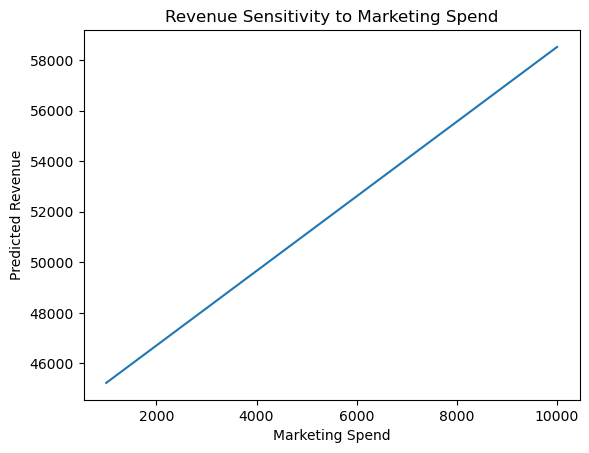

In [54]:
plt.plot(marketing_range, results)
plt.xlabel("Marketing Spend")
plt.ylabel("Predicted Revenue")
plt.title("Revenue Sensitivity to Marketing Spend")
plt.show()

This plot gives :<br>

**Direction** : More marketing → more revenue.<br>

**Magnitude** :From the graph:<br>
<ul>
<li>1000 spend → ~45,000 revenue</li>

<li>10,000 spend → ~58,500 revenue</li>
</ul>

→ That’s ≈ +13,500 revenue increase.

### **7. Revenue gained vs Marketing cost spent**


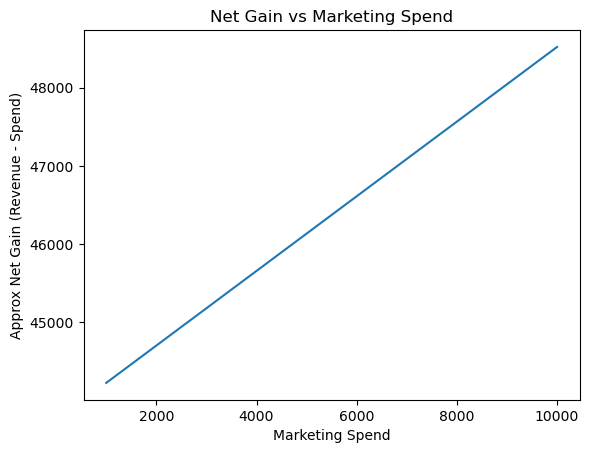

In [56]:
roi = (np.array(results) - marketing_range)  # simplistic profit approx

plt.plot(marketing_range, roi)
plt.xlabel("Marketing Spend")
plt.ylabel("Approx Net Gain (Revenue - Spend)")
plt.title("Net Gain vs Marketing Spend")
plt.show()


### **8. Business Executive Summary**

In [ ]:
df.groupby("performance_tier")["predicted_revenue"].mean()
#Calculate average predicted revenue for each group


performance_tier
High Growth Business        81194.567722
Low Performance Business    19467.272767
Stable Business             48743.780792
Name: predicted_revenue, dtype: float64